In [678]:
import numpy as np
import matplotlib
import math
%matplotlib inline

from matplotlib import pyplot as plt

$$ x^2 + 4sin(x)-2 $$

In [679]:
def f(x):
    return np.power(x, 2) + 4 * np.sin(x) - 2

The boundaries of the considered interval

In [680]:
a = 10

The point at which we construct plots of functions

In [681]:
x = np.arange(-a, a, 0.001, np.float)

Plot of original function

In [682]:
def plot_func(f=f, label="f(x)"):
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label)
    plt.title("original function")
    plt.legend(loc='lower right')
    plt.show()

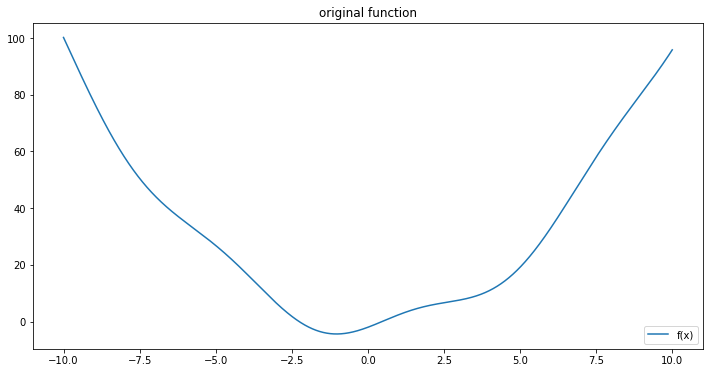

In [683]:
plot_func()

### Lagrange polynomial on equaly spaced points 

Interpolation points

In [684]:
def get_linspace(a, n):
    return np.linspace(-a, a, n, np.float)

We construct our intrpolation function using following formulas:

$$ L_n(x) = \sum_{i=0}^{n} l_i(x)f(x_i) = \sum_{i=0}^{n} \frac{\omega_{n+1}(x)}{(x-x_i)\omega_{n+1}'(x_i)} f(x_i)$$

$$ \omega_{n+1}(x) = (x-x_0)(x-x_1)...(x-x_n)$$

$$ \omega_{n+1}'(x_k) = (x-x_0)..(x-x_{k-1})(x-x_{k+1})...(x-x_n)$$

$$ l_k(x) = \frac{\omega_{n+1}(x)}{(x-x_k) \omega_{n+1}'(x_k)}$$

In [685]:
def omega(x, k, xn):
    prod = 1
    for i, xi in enumerate(xn): 
        if(i != k):
            prod *= (x - xi)
    return prod

In [686]:
def omega_(k, xn):
    prod = 1
    for i, xi in enumerate(xn):
        if i != k:
            prod *= (xn[k] - xi)
            
    return prod
            

In [687]:
def l(x, k, xn):
    return omega(x, k, xn) / omega_(k, xn)

In [688]:
def L_n(x, xn, f=f):
    sum = 0
    for i, xi in enumerate(xn):
        sum += l(x, i, xn) * f(xi)
    return sum

Utility functions for esear plotting

In [689]:
def plot_diff(L_1, L_2, a, n, f=f, get_lin_1=get_linspace, get_lin_2=get_linspace, \
              label1="original function", label2="interpolation in eq. spaced point", \
              label3="interpolation in Ch. point"):
    xn_1 = get_lin_1(a, n)
    xn_2 = get_lin_2(a, n)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label1)
    plt.plot(x, L_1(x, xn_1, f), label=label2)
    plt.plot(x, L_2(x, xn_2, f), label=label3)
    plt.title("Comparison with {} poitns interpolation".format(n))
    plt.legend(loc='lower right')
    plt.show()

In [690]:
def plot_int(L, a, n, f=f, get_linspace=get_linspace, \
             label1="original function", label2="interpolation in eq. spaced point"):
    xn = get_linspace(a, n)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label1)
    plt.plot(x, L(x, xn, f), label=label2)
    plt.title("Comparison with {} poitns interpolation".format(n))
    plt.legend(loc='lower right')
    plt.show()

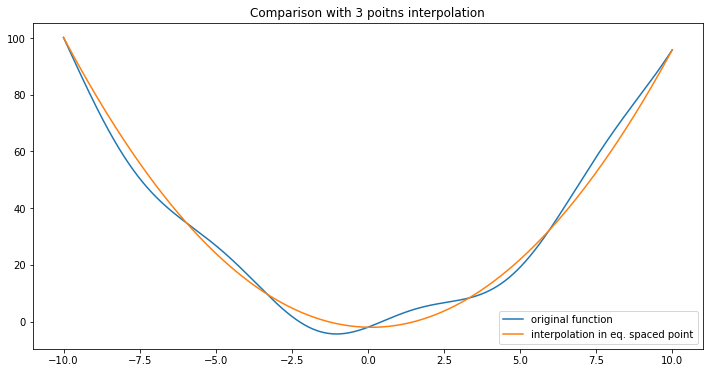

In [691]:
plot_int(L_n, a, 3)

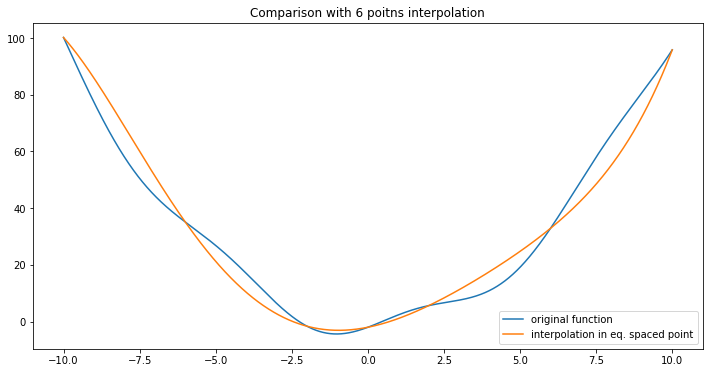

In [692]:
plot_int(L_n, a, 6)

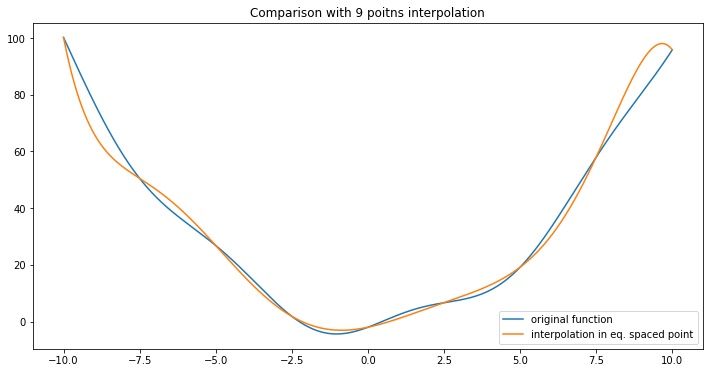

In [693]:
plot_int(L_n, a, 9)

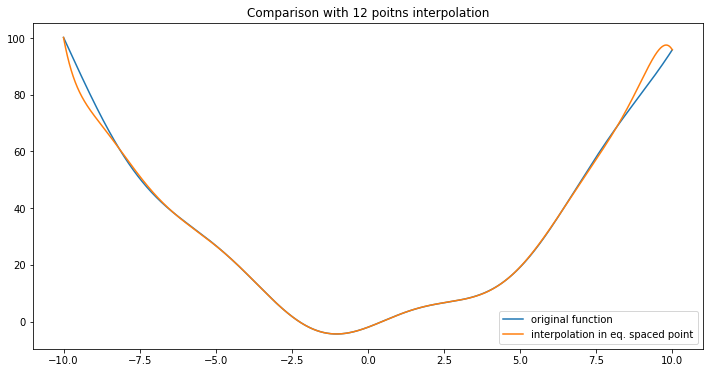

In [694]:
plot_int(L_n, a, 12)

### Lagrange polynomial with points in Ch. polynomial roots

Ch. polynomial roots are:

$$ x_i = acos(\frac{2i+1}{2n+2}\pi)$$$$i=0,...,n$$

In [695]:
def get_roots(a, n):
    xn = []
    for i in range(n):
        xn.append(a * np.cos((2 * i + 1) * np.pi / (2 * n + 2)))
    return xn

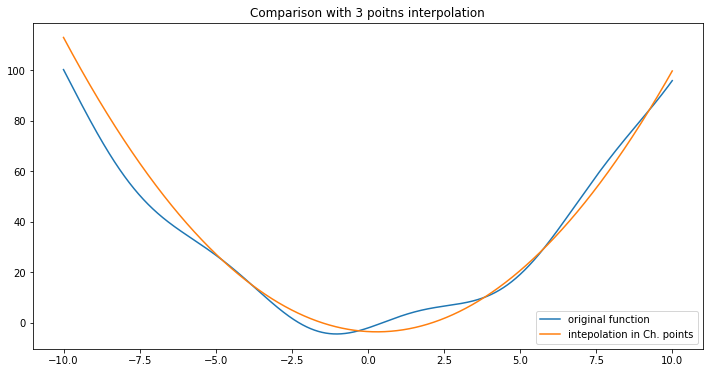

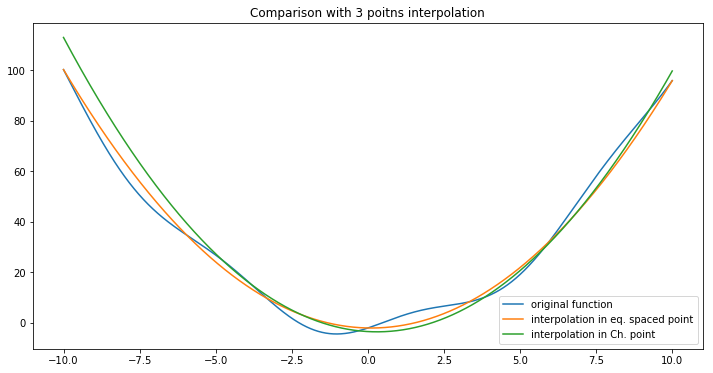

In [696]:
n=3
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

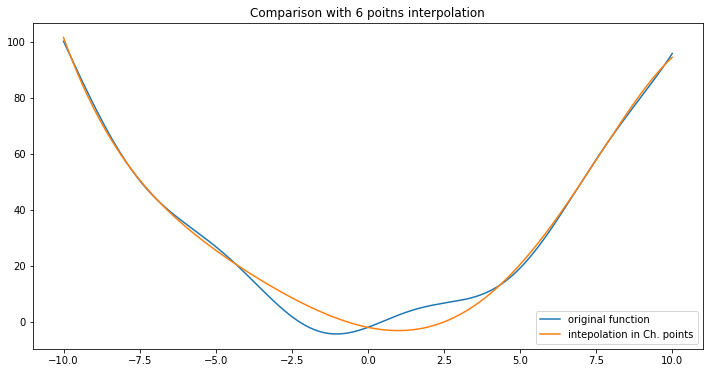

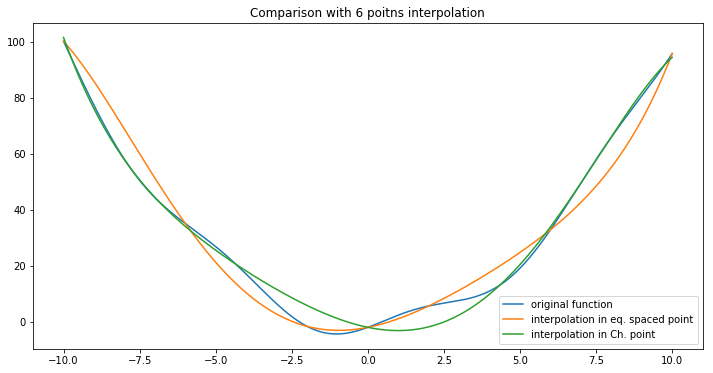

In [697]:
n=6
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

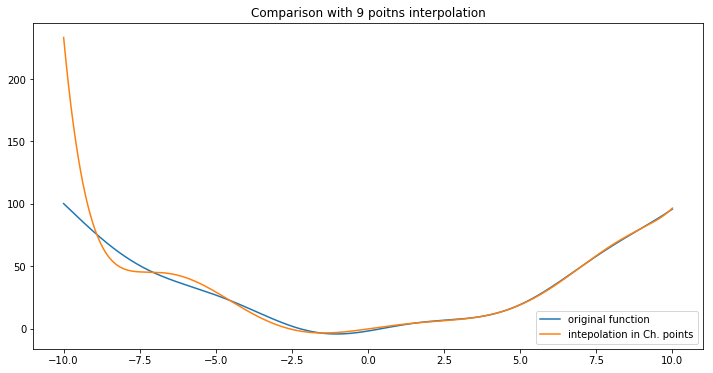

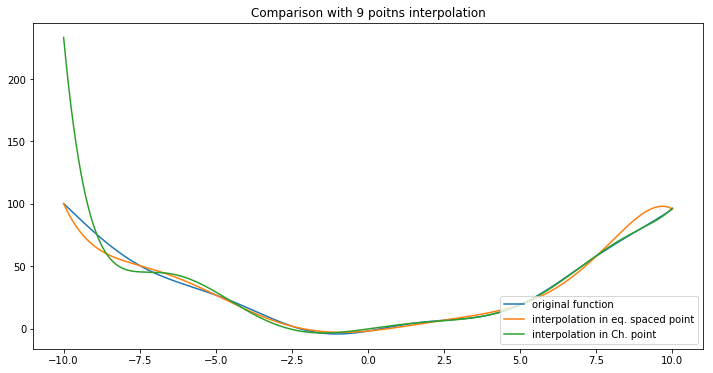

In [698]:
n=9
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

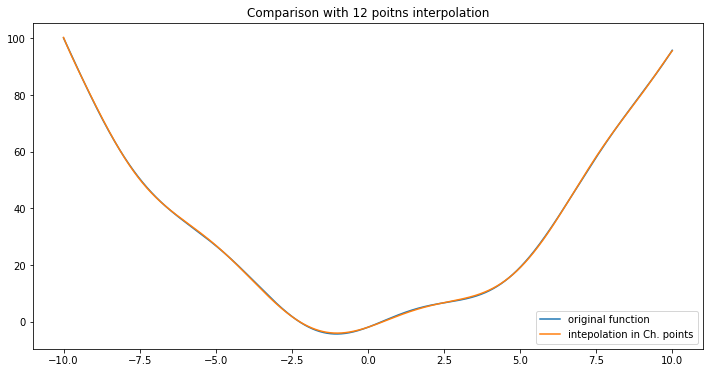

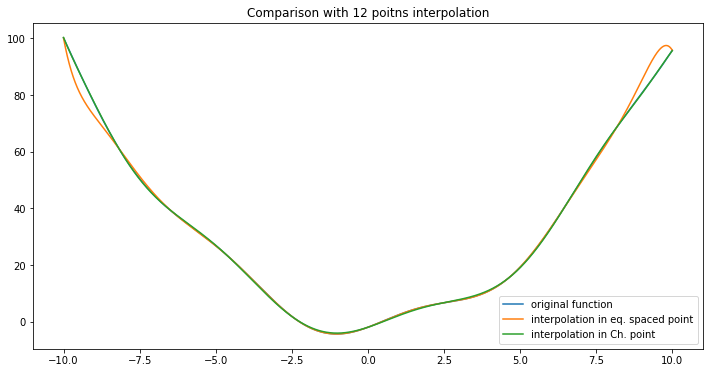

In [699]:
n=12
plot_int(L_n, a, n, get_linspace=get_roots, label2="intepolation in Ch. points")
plot_diff(L_n, L_n, a, n, get_lin_2=get_roots)

### Deviations from original function

In [700]:
n = 100
x = np.linspace(-a, a, n, np.float) # deviation points

Noramal Lg. polynomial

In [701]:
def get_div(L_n, a, n, f=f, get_linspace=get_linspace):
    dev = 0
    x = np.linspace(-a, a, 100, np.float)
    xn = get_linspace(a, n)
    L = lambda x: L_n(x, xn, f)
    for i in range(1, 100):
        dev = max(dev, abs(L(x[i])-f(x[i]))*(x[i]-x[i-1]))
    return dev

For lg. poly in eq. spaced points

In [702]:
get_div(L_n, a, 3)

1.1524956889669284

In [703]:
get_div(L_n, a, 6)

2.1927606353963767

In [704]:
get_div(L_n, a, 9)

2.2598541502910012

In [705]:
get_div(L_n, a, 12)

1.390779604264467

For lg. poly in Ch. points

In [706]:
get_div(L_n, a, 3, get_linspace=get_roots)

2.9068090113516423

In [707]:
get_div(L_n, a, 6, get_linspace=get_roots)

1.5094112262892996

In [708]:
get_div(L_n, a, 9, get_linspace=get_roots)

18.3420826090969

In [709]:
get_div(L_n, a, 12, get_linspace=get_roots)

0.06214969149093143

### Same stuff for $h(x)=|x|f(x)$

In [710]:
def h(x):
    return np.abs(x) * f(x)

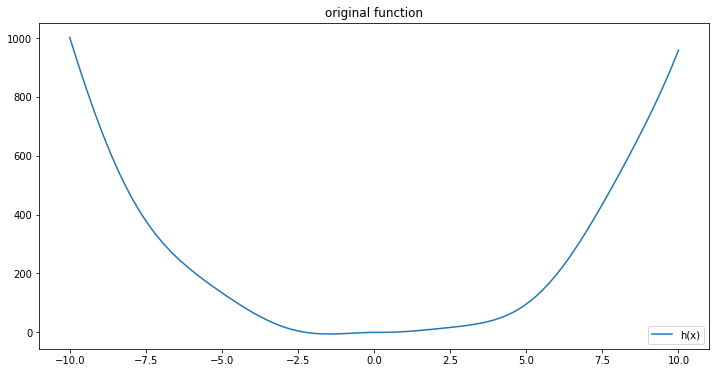

In [711]:
plot_func(h, "h(x)")

In [712]:
def result(n, func=f):
    print("n =", n)
    plot_int(L_n, a, n, f=func)
    plot_int(L_n, a, n, f=func, get_linspace=get_roots, label2="intepolation in Ch. points")
    plot_diff(L_n, L_n, a, n, f=func, get_lin_2=get_roots)
    
    print("Deviation of eq. points is equal to", get_div(L_n, a, n))
    print("Deviation of Ch. points is equal to", get_div(L_n, a, n, get_linspace=get_roots))

n = 12


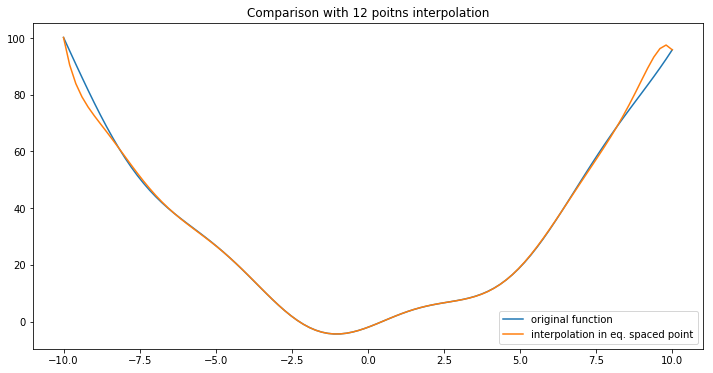

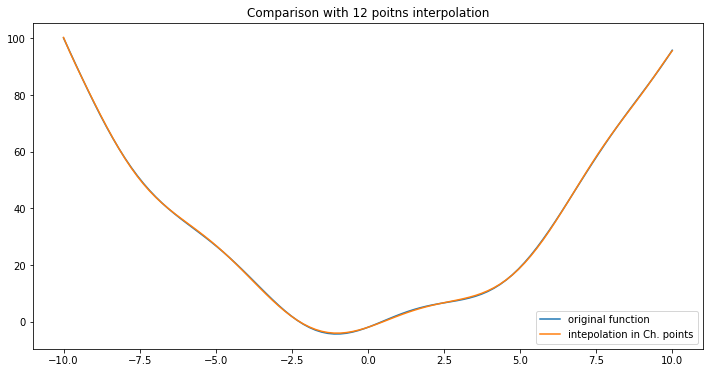

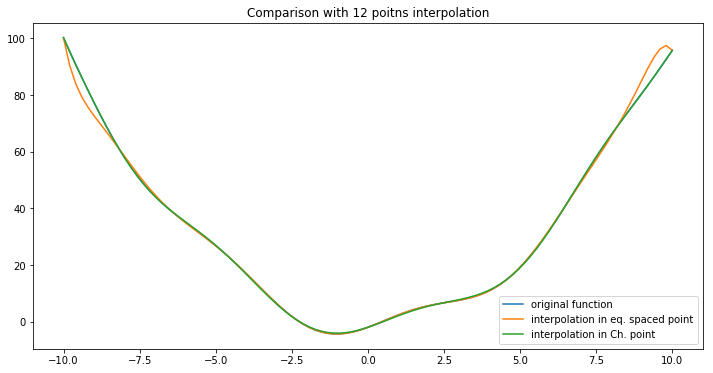

Deviation of eq. points is equal to 1.390779604264467
Deviation of Ch. points is equal to 0.06214969149093143


In [713]:
result(12, f)

n = 3


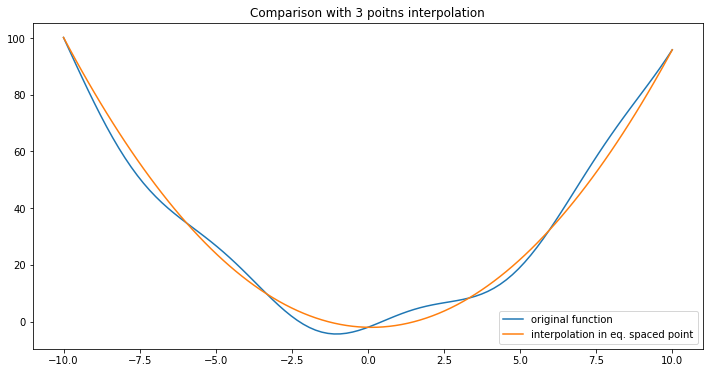

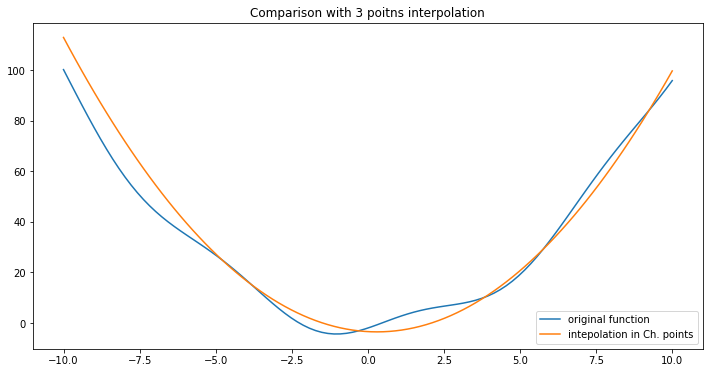

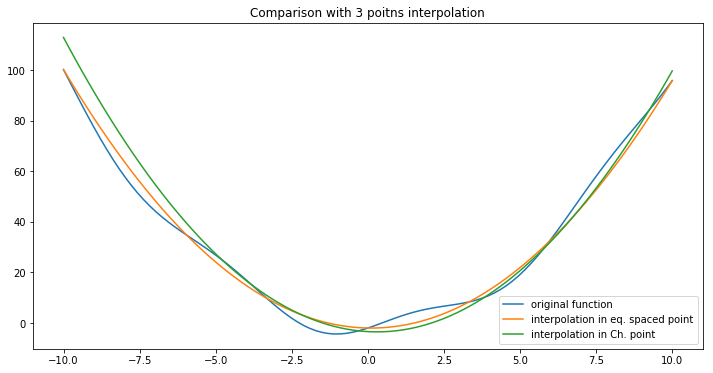

Deviation of eq. points is equal to 1.1524956889669284
Deviation of Ch. points is equal to 2.9068090113516423


In [714]:
result(3, f)

n = 3


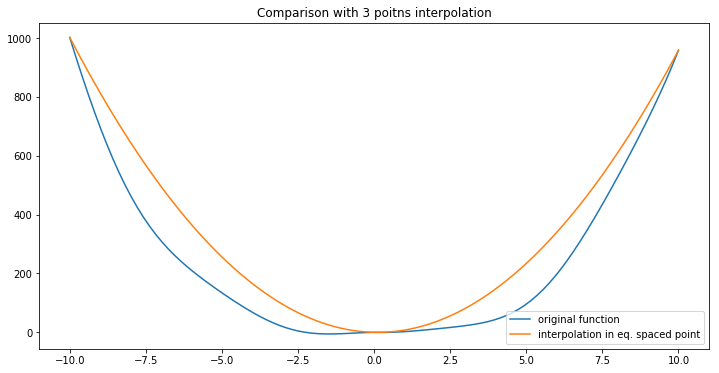

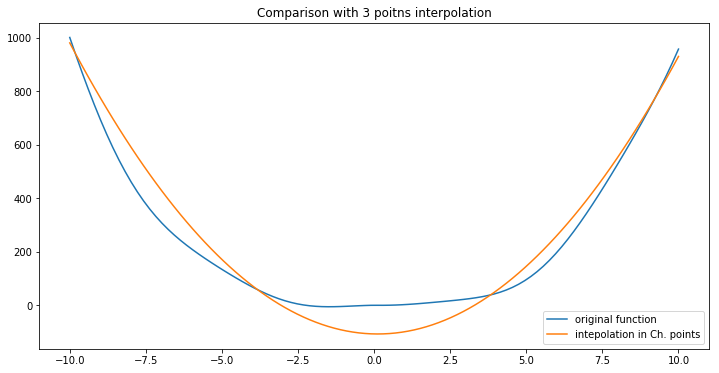

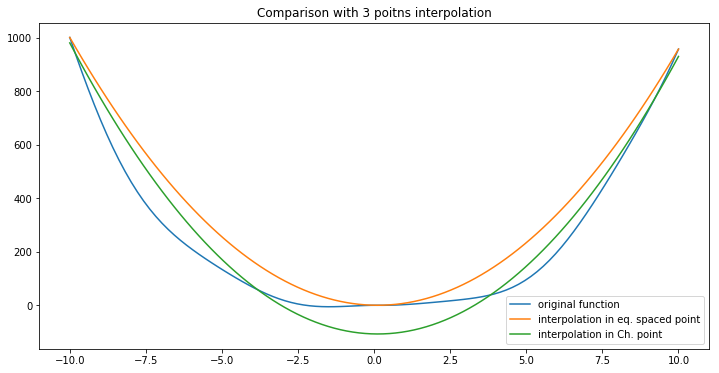

Deviation of eq. points is equal to 1.1524956889669284
Deviation of Ch. points is equal to 2.9068090113516423


In [715]:
result(3, h)

n = 12


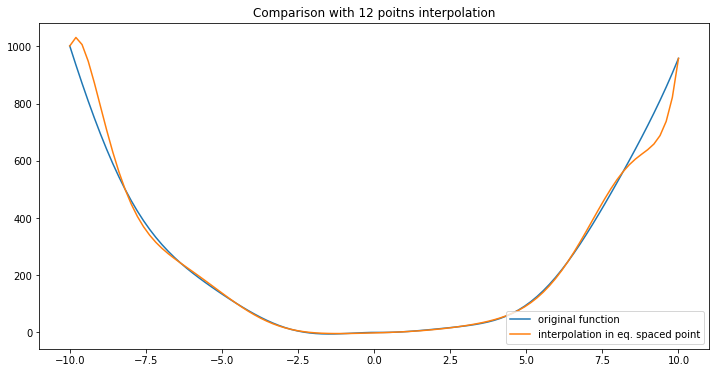

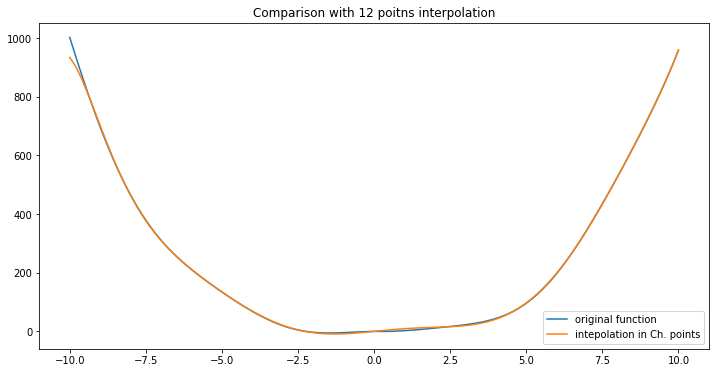

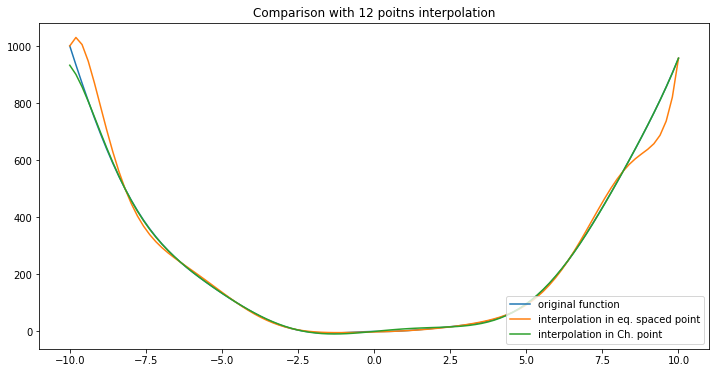

Deviation of eq. points is equal to 1.390779604264467
Deviation of Ch. points is equal to 0.06214969149093143


In [716]:
result(12, h)

### Hermite interpolation

derivatives

In [717]:
def f_(x):
    return 2*x+4*np.cos(x)

In [718]:
def h_(x):
    if (x > 0):
        return 3*x^2+4*np.sin(x)+4*x*np.cos(x)-2
    return -1 * (3*x^2+4*np.sin(x)+4*x*np.cos(x)-2)

It is kinda hard to explain what is going on here. But i will try. First of all analytical representation is following: 

$$ H(x)=\sum_{j=1}^{s} \sum_{m=0}^{n_{j}-1} \sum_{q=0}^{-1-m} \frac{F^{(m)}\left(x_{j}\right)}{m ! q !}\left(x-x_{j}\right)^{m+q} \prod_{i \neq j}\left(x-x_{i}\right)^{n_{i}}\left\{\frac{d^{q}}{d x^{q}} \frac{1}{\prod_{t \neq j}\left(x-x_{\ell}\right)^{n_{l}}}\right\}_{x=x_{j}} $$

@ <a href="http://www.apmath.spbu.ru/ru/staff/uteshev/publ/publ.pdf">К ЗАДАЧЕ ПОЛИНОМИАЛЬНОГО ИНТЕРПОЛИРОВАНИЯ
С КРАТНЫМИ УЗЛАМИ. А. Ю. Утешев, Г. Ш. Тамасян </a>


It is not very convenient \*khm\* (and it is not clear how) to present it in the form of code

I found only one convinient way to code this. This method is declared in Wikipedia, so i'm not 100% sure that this method represent the real Hermite polynom. But it works, and works better then Lagrangian polynom. 

So this is the <a href="https://en.wikipedia.org/wiki/Hermite_interpolation">article</a>

This method relys on creating a <a href="https://en.wikipedia.org/wiki/Divided_differences">divided differences table</a>. To code this we need to do 2 things: 

1) Build this table 
2) Take coefficients from diagonal and multyply the k-th coefficient by $\prod_{i=0}^{k-1}\left(x-z_{i}\right)$

1-st step is really straightforward, and discribed in Wikipedia

2-d sted is a bit more complicated, becouse we need to build a lot of polynoms. We can do it in symbols, BUT it would be really slow solution, so we need to find somting else. Actualy we can use fact that polynoms are just vectors, so we can reduse this task to multyplying vectors. So let's see those vectors (let n = 3)

1) $ H(x) = k_0 + k_1 (x-z_0) + k_2 (x-z_0)^2 + k_3 (x-z_0)^2(x-z_2) + ... + k_6 (x-z_0)^2(x-z_2)^2(x-z_4)^2$

2) we are interested in calculating this values in brackets. Let's imagin that we calulated value on 3-th step $v$. So $v=(x-z_0)^2(x-z_2)$. All we need to do is multyply this by $(x-z_2)$. Vector representation for v looks like $[a, b, c, 1]$, and for bracket is $[-z_2, 1]$. Doing some math we can come up with formulas to calculating coefficients of next $v$, so this formulas are:

$$x^0: v[0]v_1[0]$$ 
$$...$$
$$ x^k: v[k]v_1[0] + v[k-1]v_1[1]$$
$$...$$
$$ x^n: 1$$

So long story short: using this method you can easy reduce task to vector multyplication (which is not that hard, you only need to be cearfull with coefficients)

In [719]:
def get_A(a, n, get_linspace=get_linspace, f=f, f_=f_):
    xn = get_linspace(a, n)
    A = np.zeros(shape=(2*n, 2*n+1))
    
    for i, xi in enumerate(xn):
        A[2*i][0] = xi
        A[2*i+1][0] = xi
        
        A[2*i][1] = f(xi)
        A[2*i+1][1] = f(xi)
    
    for i in range(2*n-1):
        if(i % 2 == 0):
            A[i][2] = f_(xn[i//2])
        else:
            A[i][2] = (f(xn[(i+1)//2]) - f(xn[i//2]))/(xn[(i+1)//2] - xn[i//2])
            
    for i in range(1, 2*n-1):
        for j in range(2*n-i-1):
            A[j][i+2] = (A[j+1][i+1] - A[j][i+1]) / (A[i+j+1][0] - A[j][0])
    return A

In [720]:
def get_V(v1, v2, n, k):
    
    v = np.zeros(shape=(n))
    n = k
    v[0] = v1[0]*v2[0]
    for i in range(1, n):
        v[i] = v1[i]*v2[0] + v1[i-1]*v2[1]
    v[n] = 1
    return v

In [721]:
def get_H(a, n, f=f, f_=f_, get_linspace=get_linspace):
    A = get_A(a, n, get_linspace, f, f_)
    H = np.zeros(shape=(2*n+1,))
    v = np.zeros(shape=(2*n+1,))
    v[0] = 1
    H = A[0][1] * v
    #print(v, H)
    for i in range(1, 2*n):
        v1 = [-A[i-1][0], 1]
        v = get_V(v, v1, 2*n+1, i)
        H += A[0][i+1] * v
    #    print(v, H)
    v1 = [-A[2*n-1][0], 1]
    v = get_V(v, v1, 2*n+1, 2*n)
    H += A[0][2*n] * v
    #print(v)
    return H

In [722]:
def calc_H(h, x):
    s = 0
    for i in range(len(h)):
        s += h[i] * np.power(x, i) 
    return s

In [723]:
def plot_h(a, n, get_H=get_H, f=f, f_=f_, get_linspace=get_linspace,\
              label1="original function", label2="Hermit interpolation"):
    h = get_H(a, n, f, f_, get_linspace)
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label1)
    plt.plot(x, calc_H(h, x), label=label2)
    plt.title("Comparison with {} poitns interpolation".format(n))
    plt.legend(loc='lower right')
    plt.show()

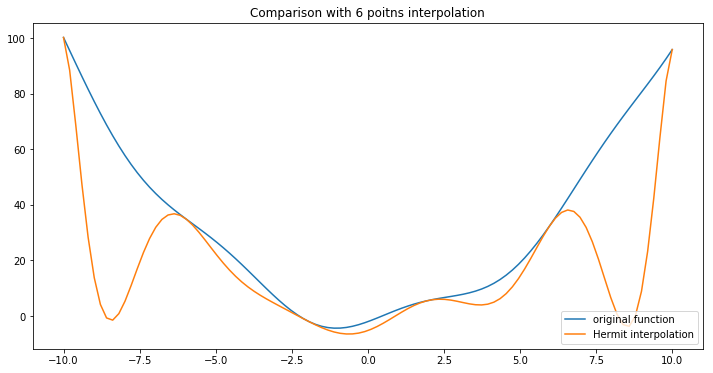

In [724]:
plot_h(a, 6)

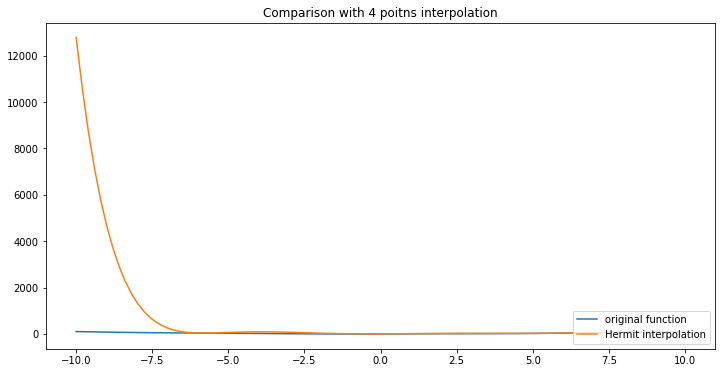

In [725]:
plot_h(a, 4, get_linspace=get_roots)

We can see a little problem here. In this case the minimal point (root of Ch. polynom) is app. -5.9. So we don't interpolate function $\forall x < -5.9$. So there values of H are random (for us) and, as we can see, they are pretty high. So the scale of the chart is ruined and we can't see see result's of our work. So i made another utility plotting function, that changes the bounds of this plot from $(-a, a)$ to $(min(roots), a)$

In [726]:
def plot_h_root(a, n, get_H=get_H, f=f, f_=f_,\
              label1="original function", label2="Hermit interpolation"):
    h = get_H(a, n, f, f_, get_roots)
    xn = get_roots(a, n)
    x = np.arange(min(xn), max(xn), 0.001, np.float)
    plt.figure(figsize=(12, 6))
    plt.plot(x, f(x), label=label1)
    plt.plot(x, calc_H(h, x), label=label2)
    plt.title("Comparison with {} poitns interpolation".format(n))
    plt.legend(loc='lower right')
    plt.show()

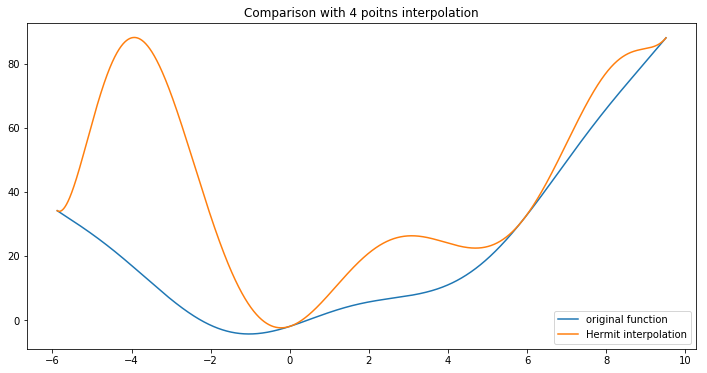

In [729]:
plot_h_root(a, 4)